In [1]:
import matplotlib.pyplot as plt

In [2]:
# Matplotlib essentials

In [3]:
# Figures and subplots

In [4]:
fig = plt.figure(figsize=(12, 6), dpi=200)

<Figure size 2400x1200 with 0 Axes>

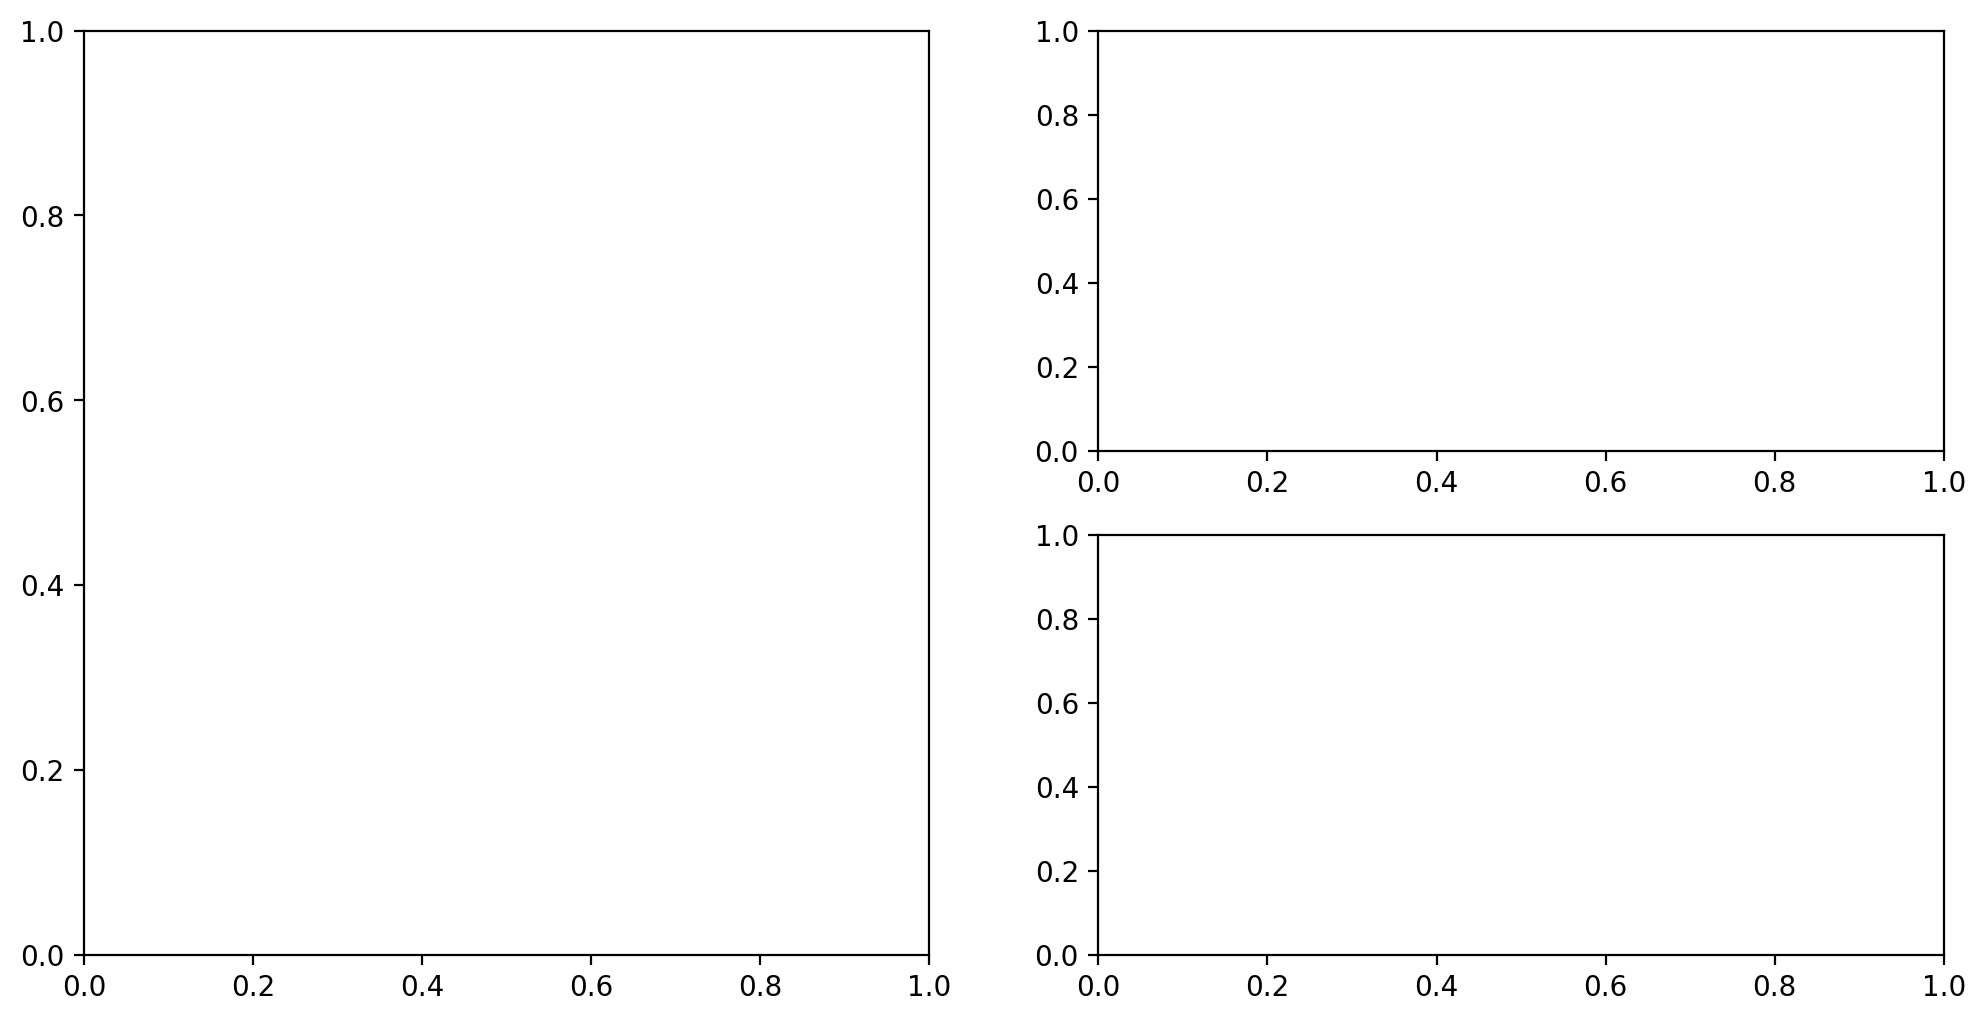

In [5]:
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)
fig

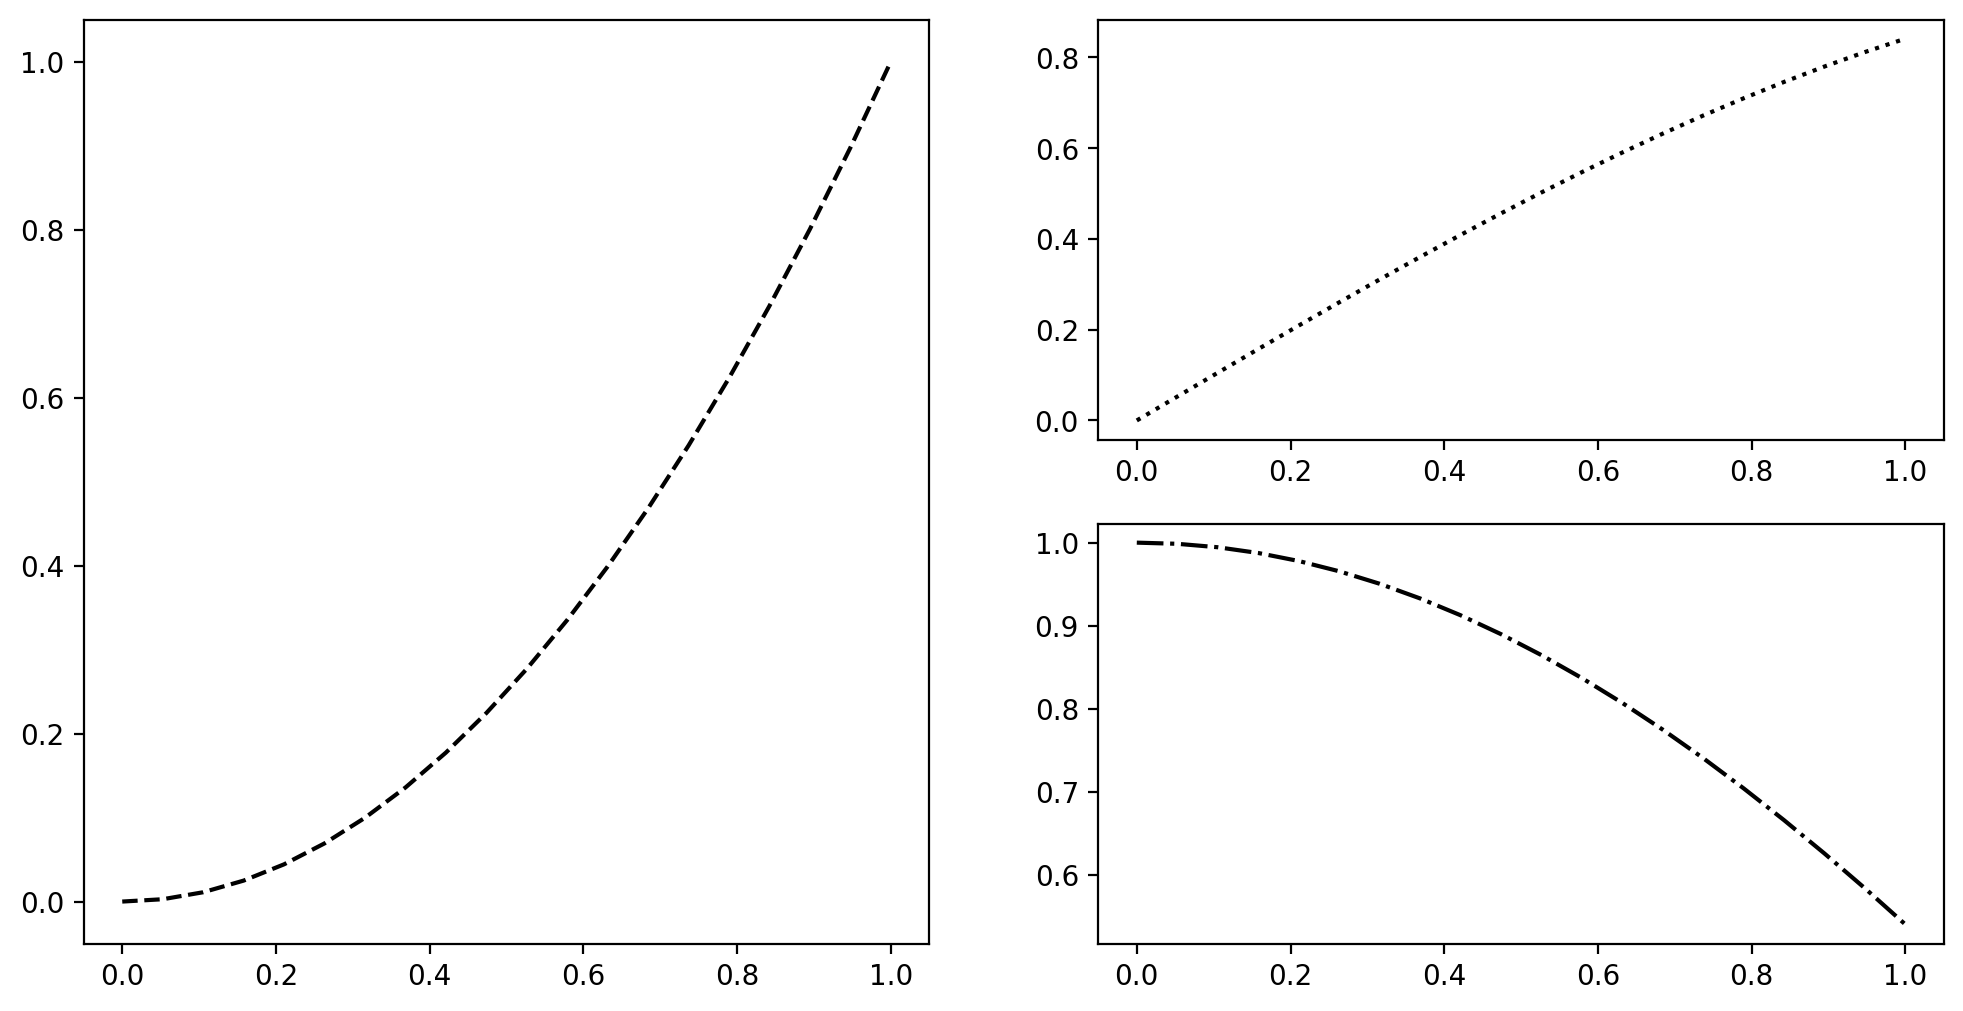

In [6]:
import numpy as np
x = np.linspace(0, 1, num=20)
y1 = np.square(x)
ax1.plot(x, y1, color='black', linestyle='--')

y2 = np.sin(x)
ax2.plot(x, y2, color='black', linestyle=':')

y3 = np.cos(x)
ax3.plot(x, y3, color='black', linestyle='-.')
fig

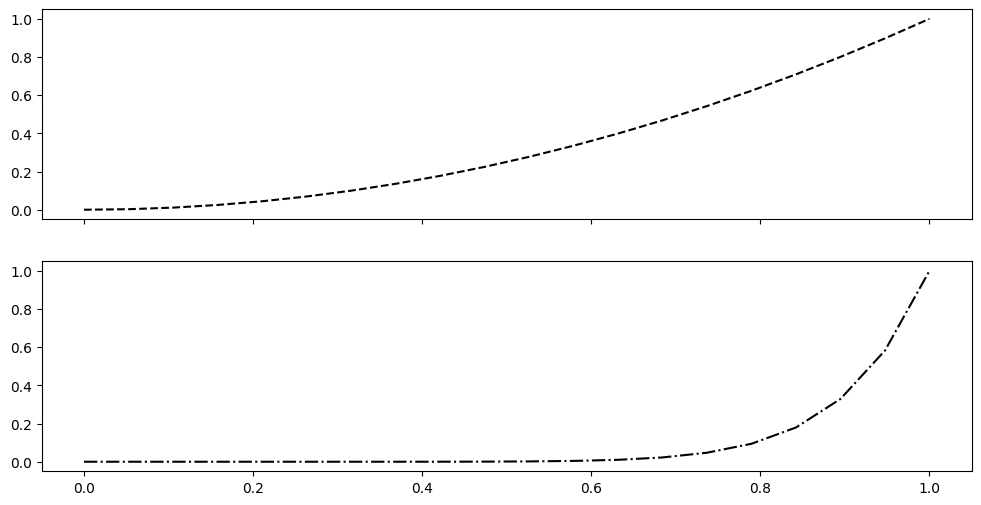

In [7]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(x, y1, color='black', linestyle='--')
y2=np.power(x, 10)
ax2.plot(x, y2, color='black', linestyle='-.')

In [8]:
# Colors, Markers and Linestyles

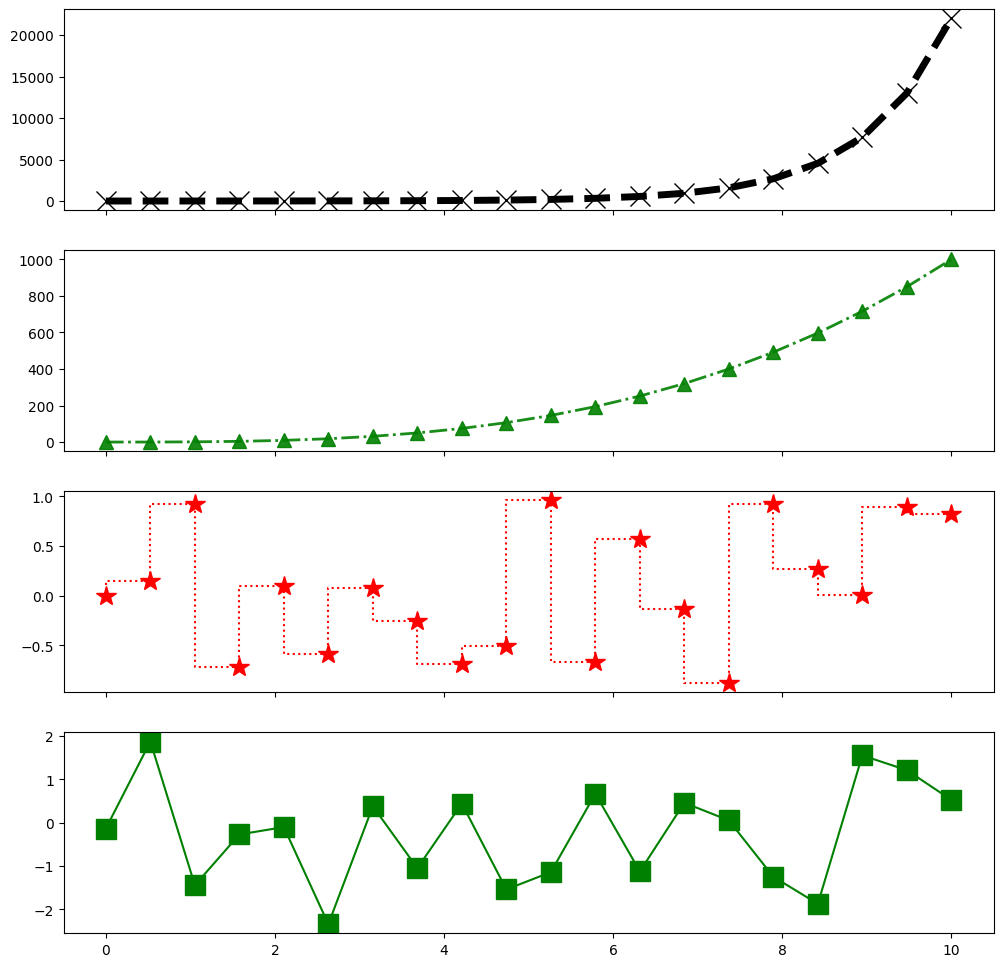

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 12), sharex=True)
x = np.linspace(0, 10, num=20)
y1 = np.exp(x)
y2 = x ** 3
y3 = np.sin(y2)
y4 = np.random.randn(20)

ax1.plot(x, y1, color='black', linestyle='--', linewidth=5, marker='x', markersize=15)
ax2.plot(x, y2, color='green', linestyle='-.', linewidth=2, marker='^', markersize=10, alpha=0.9)
ax3.plot(x, y3, color='red', linestyle=':', marker='*', markersize=15, drawstyle='steps')
ax4.plot(x, y4, color='green', linestyle='-', marker='s', markersize=15)

In [10]:
# Ticks, Labels and Legends

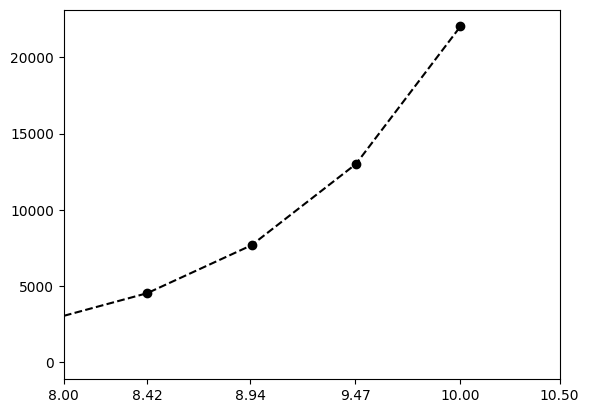

In [11]:
plt.xlim([8, 10.5])
plt.xticks([8, 8.42, 8.94, 9.47, 10, 10.5])
plt.plot(x, y1, color='black', linestyle='--', marker='o')

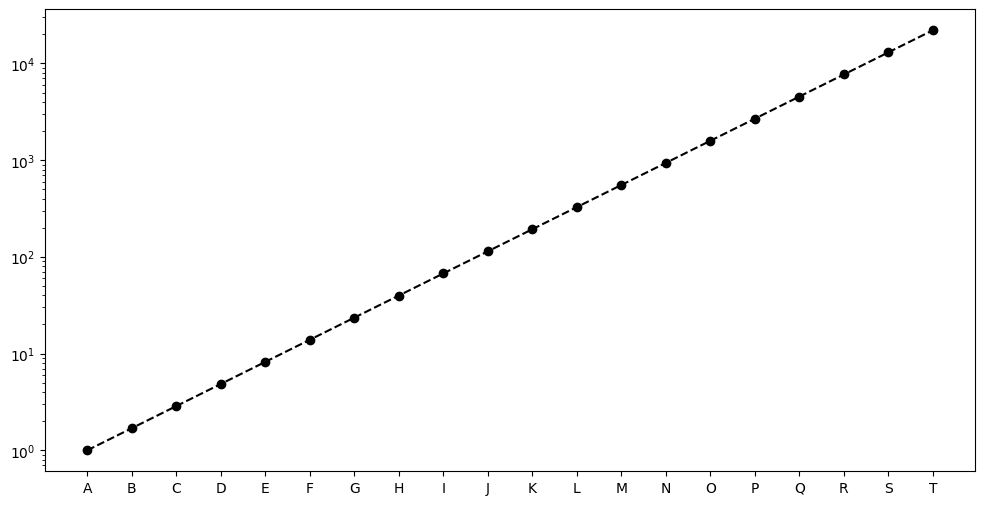

In [13]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_yscale('log')
ax.set_xticks(x)
# ax.set_xticklabels(list('ABCDEFGHIJKLMNOPQRSTUV'))
ax.set_xticklabels(list('ABCDEFGHIJKLMNOPQRST'))
ax.plot(x, y1, color='black', linestyle='--', marker='o', label='y=exp(x)')

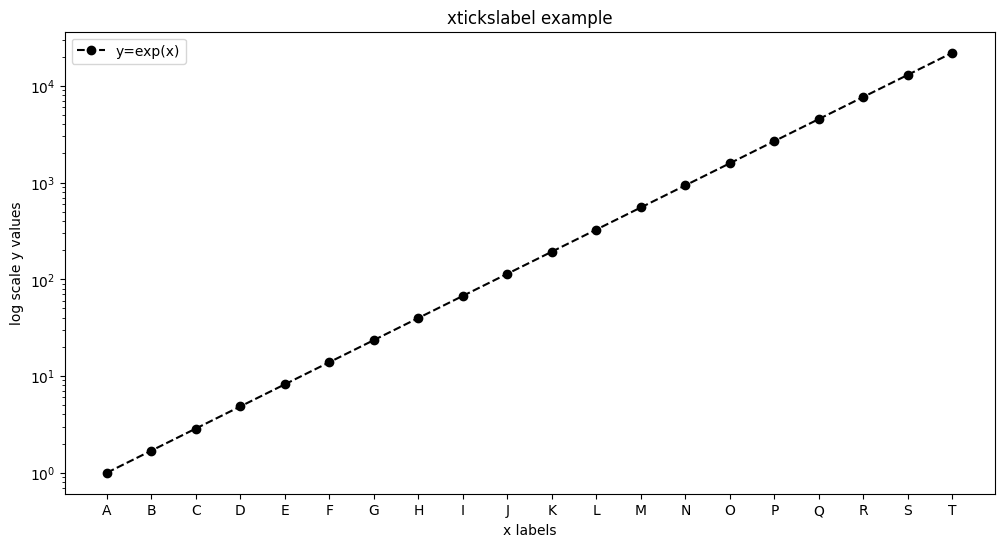

In [15]:
ax.set_title('xtickslabel example')
ax.set_xlabel('x labels')
ax.set_ylabel('log scale y values')
ax.legend(loc='best')
fig

In [16]:
# Annotations

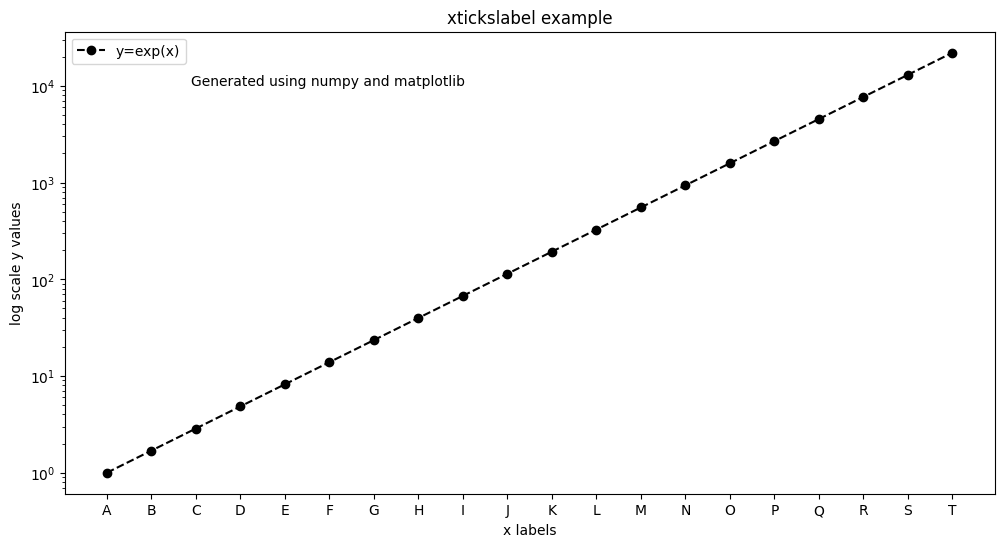

In [17]:
ax.text(1, 10000, 'Generated using numpy and matplotlib')
fig

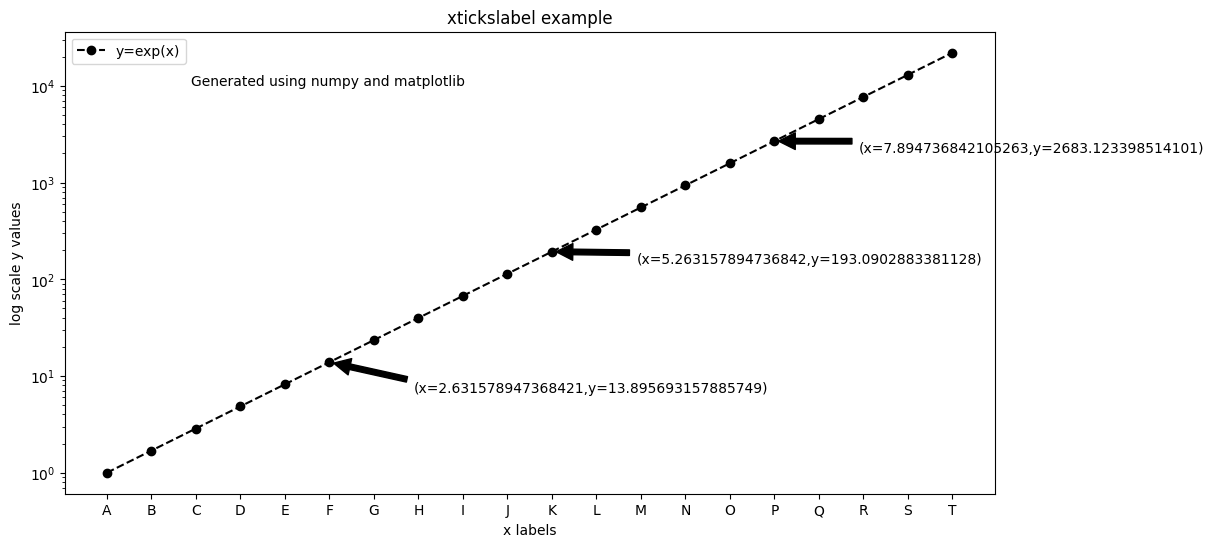

In [18]:
for i in [5, 10, 15]:
 s = '(x=' + str(x[i]) + ',y=' + str(y1[i]) + ')'
 ax.annotate(s, xy=(x[i], y1[i]), xytext=(x[i]+1, y1[i]-5), arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='left', verticalalignment='top')
fig

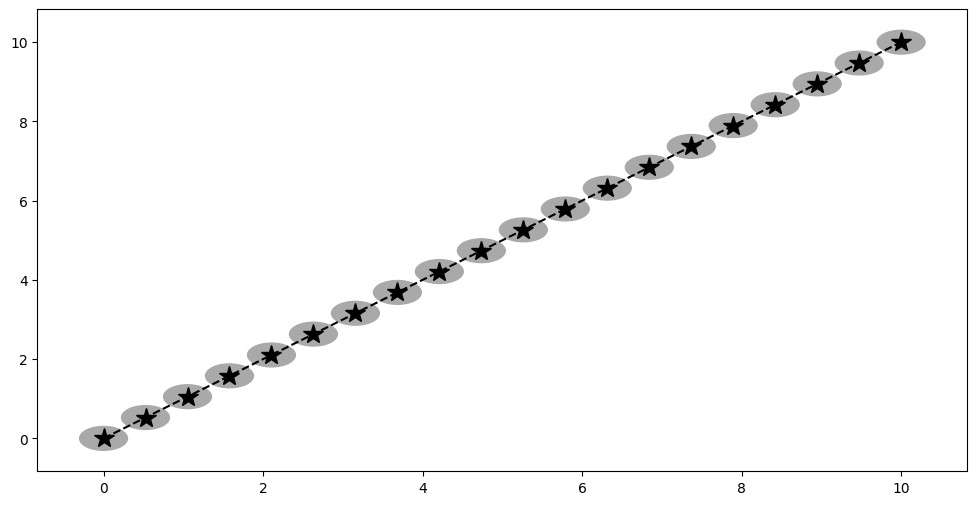

In [19]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(x, x, linestyle='--', color='black', marker='*', markersize=15)
for val in x:
    ax.add_patch(plt.Circle(xy=(val, val), radius=0.3, color='darkgray'))

In [20]:
# Saving plots to file

In [21]:
fig.savefig('fig.png', dpi=200)

In [22]:
!display fig.png

/bin/bash: line 1: display: command not found


In [23]:
# Matplotlib and Pandas

In [24]:
import pandas as pd

In [25]:
df = pd.DataFrame(index=range(1000), columns=['Cont value', 'Delta1 value', 'Delta2 value', 'Cat value'])
df['Cont value'] = np.random.randn(1000).cumsum()
df['Delta1 value'] = np.random.randn(1000)
df['Delta2 value'] = np.random.randn(1000)
df['Cat value'] = np.random.permutation(['Very high', 'High', 'Medium', 'Low', 'Very Low']*200)
df['Delta1 discrete'] = pd.cut(df['Delta1 value'], labels=[-2, -1, 0, 1, 2], bins=5).astype(np.int64)
df['Delta2 discrete'] = pd.cut(df['Delta2 value'], labels=[-2, -1, 0, 1, 2], bins=5).astype(np.int64)
df

,Cont value,Delta1 value,Delta2 value,Cat value,Delta1 discrete,Delta2 discrete
0,0.331821,0.643895,-1.343584,High,0,-1
1,0.730247,-0.317510,0.945572,Medium,0,1
2,1.500643,0.114675,0.983516,High,0,1
3,2.490274,1.255046,-0.684286,Very Low,1,0
4,2.471045,-0.897818,0.714080,Low,-1,1
...,...,...,...,...,...,...
995,12.622541,0.896139,2.275396,Very Low,1,2
996,11.474335,0.552545,-0.419207,High,0,0
997,13.229541,-0.060263,-1.219790,High,0,-1
998,13.680692,-0.319944,0.592829,Very high,0,0


In [26]:
# Line

<Axes: >

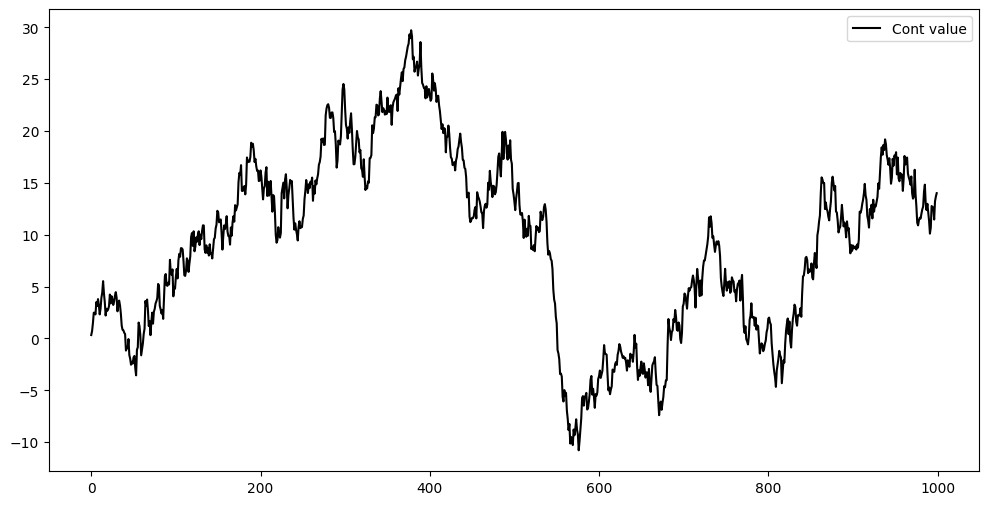

In [27]:
df.plot(y='Cont value', kind='line', color='black', linestyle='-', figsize=(12, 6))

In [28]:
# Bar

<Axes: title={'center': 'Occurrence by (Cat,Delta1)'}, xlabel='Cat value,Delta1 discrete'>

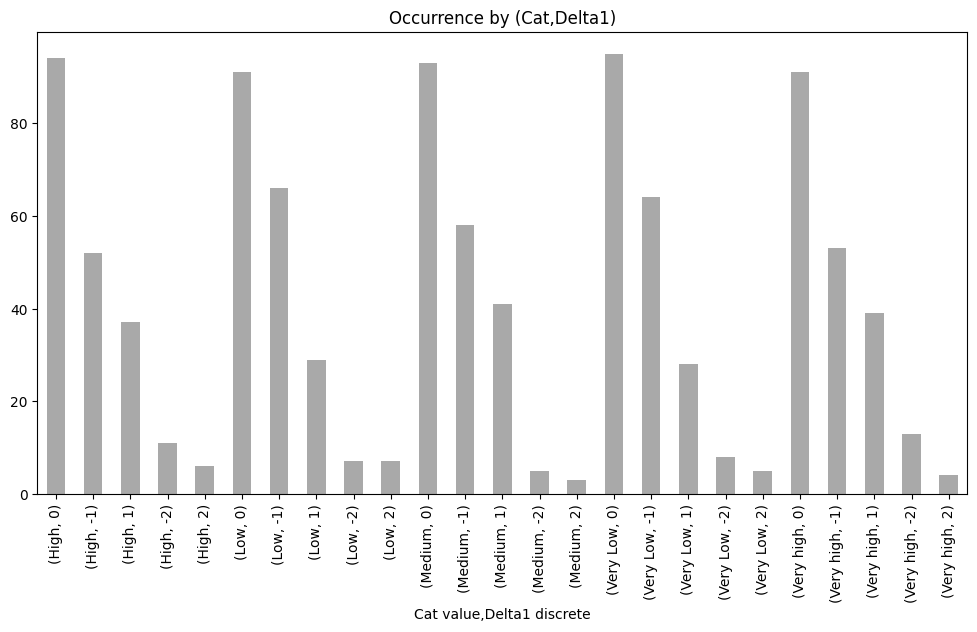

In [29]:
df.groupby('Cat value')['Delta1 discrete'].value_counts().plot(kind='bar', color='darkgray', title='Occurrence by (Cat,Delta1)', figsize=(12, 6))

<Axes: title={'center': 'Occurrence by (Delta2,Cat)'}, ylabel='Delta2 discrete,Cat value'>

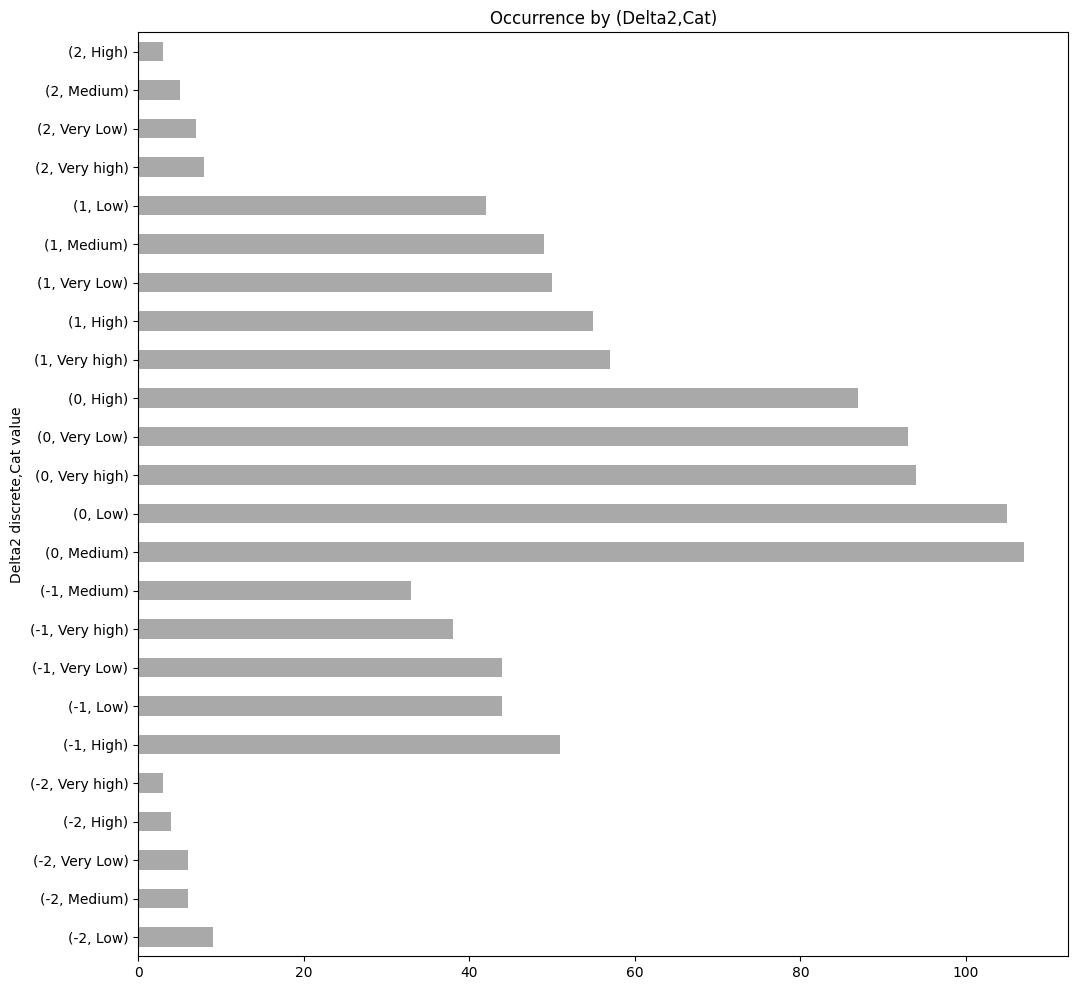

In [30]:
df.groupby('Delta2 discrete')['Cat value'].value_counts().plot(kind='barh', color='darkgray', title='Occurrence by (Delta2,Cat)', figsize=(12, 12))

In [31]:
# Histogram

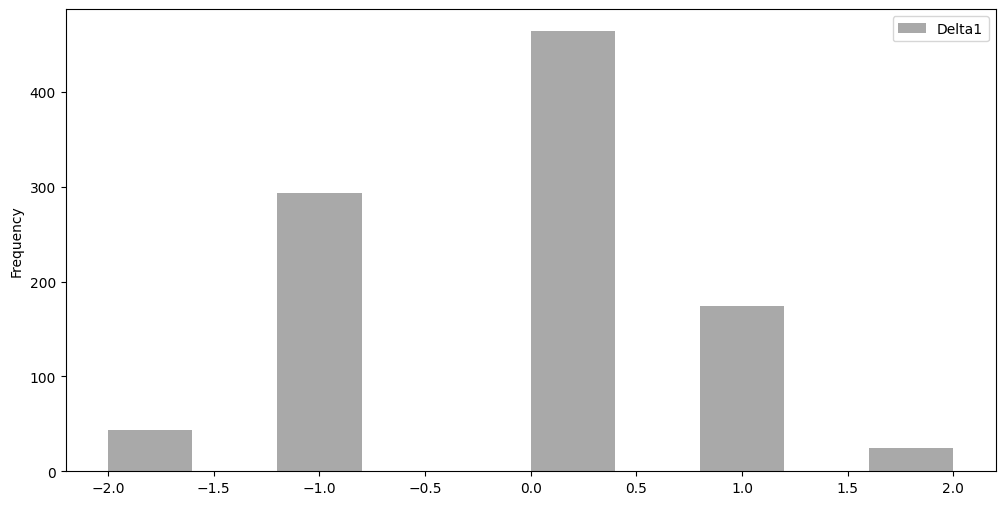

In [32]:
df['Delta1 discrete'].plot(kind='hist', color='darkgray', figsize=(12, 6), label='Delta1')
plt.legend()

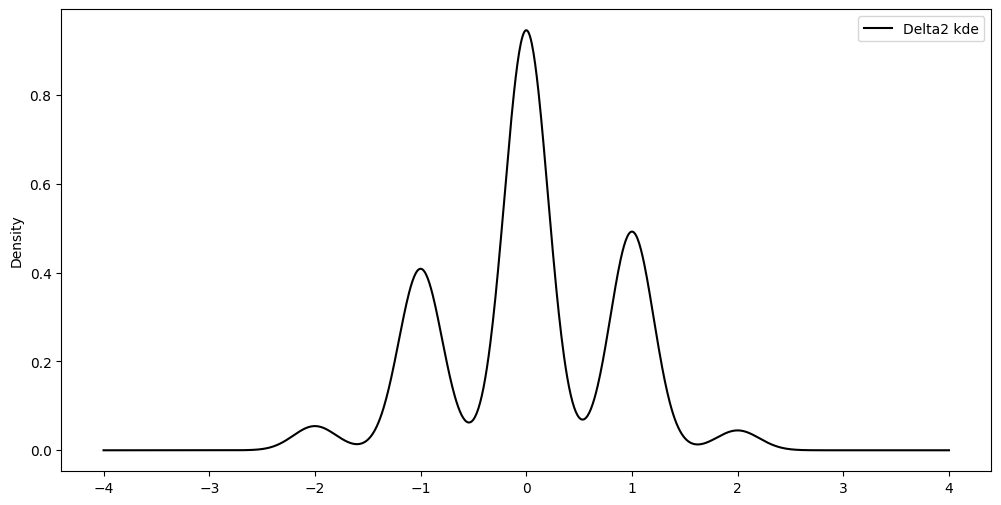

In [33]:
df['Delta2 discrete'].plot(kind='kde', color='black', figsize=(12, 6), label='Delta2 kde')
plt.legend()

In [34]:
# Scatter plot

<Axes: xlabel='Delta1 value', ylabel='Delta2 value'>

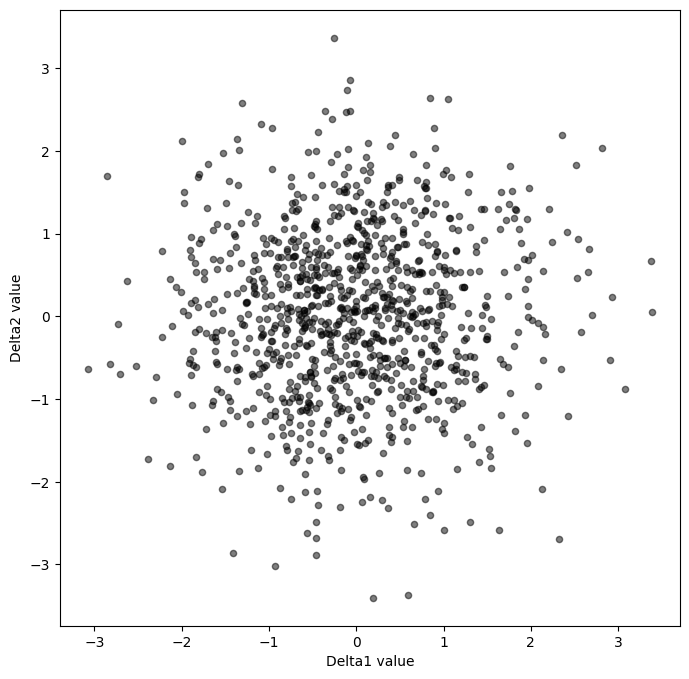

In [35]:
df.plot(kind='scatter', x='Delta1 value', y='Delta2 value', alpha=0.5, color='black', figsize=(8, 8))

array([[<Axes: xlabel='Delta1 value', ylabel='Delta1 value'>,
        <Axes: xlabel='Delta2 value', ylabel='Delta1 value'>],
       [<Axes: xlabel='Delta1 value', ylabel='Delta2 value'>,
        <Axes: xlabel='Delta2 value', ylabel='Delta2 value'>]],
      dtype=object)

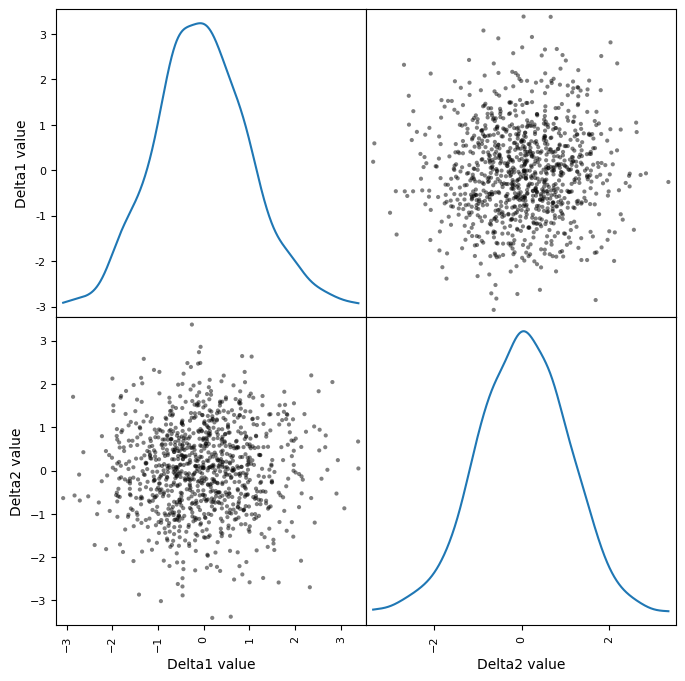

In [36]:
pd.plotting.scatter_matrix(df[['Delta1 value', 'Delta2 value']], diagonal='kde', color='black', figsize=(8, 8))

In [37]:
# Plotting time series

In [38]:
dates = pd.date_range('1992-01-01', '2012-10-22')
time_series = pd.DataFrame(index=dates, columns=['A', 'B'])
time_series['A'] = np.random.randint(low=-100, high=101, size=len(dates)).cumsum() + 5000
time_series['B'] = np.random.randint(low=-75, high=76, size=len(dates)).cumsum() + 5000
time_series

,A,B
1992-01-01,4989,4984
1992-01-02,4999,5025
1992-01-03,5032,4985
1992-01-04,5110,5037
1992-01-05,5026,5037
...,...,...
2012-10-18,2872,-95
2012-10-19,2827,-55
2012-10-20,2826,-85
2012-10-21,2850,-139


In [39]:
# Price plots

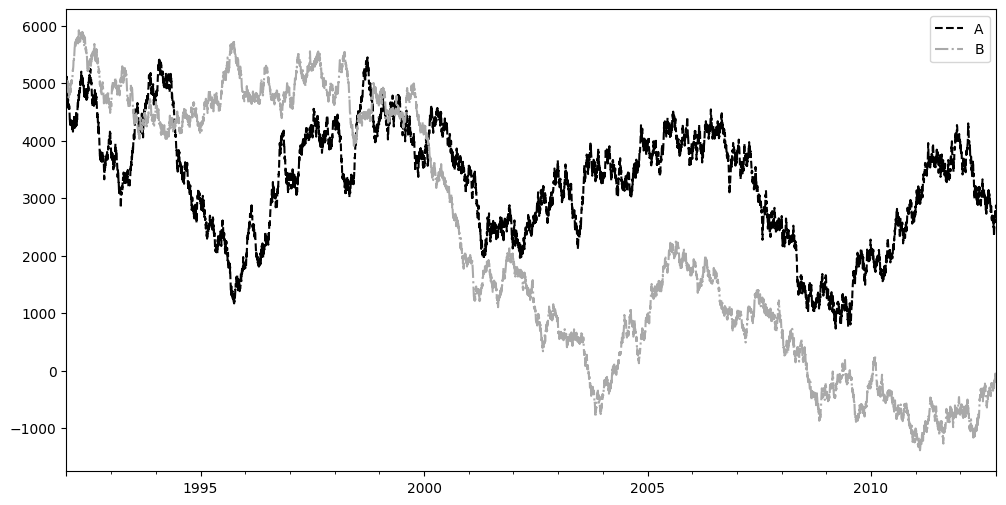

In [40]:
time_series['A'].plot(kind='line', linestyle='--', color='black', figsize=(12, 6), label='A')
time_series['B'].plot(kind='line', linestyle='-.', color='darkgray', figsize=(12, 6), label='B')
plt.legend()

In [41]:
# Price change histogram

In [42]:
time_series['A_1_delta'] = time_series['A'].shift(-1) - time_series['A'].fillna(0)
time_series['B_1_delta'] = time_series['B'].shift(-1) - time_series['B'].fillna(0)

time_series['A_5_delta'] = time_series['A'].shift(-5) - time_series['A'].fillna(0)
time_series['B_5_delta'] = time_series['B'].shift(-5) - time_series['B'].fillna(0)

time_series['A_20_delta'] = time_series['A'].shift(-20) - time_series['A'].fillna(0)
time_series['B_20_delta'] = time_series['B'].shift(-20) - time_series['B'].fillna(0)
time_series_deltas = time_series[['A_1_delta', 'B_1_delta', 'A_5_delta', 'B_5_delta', 'A_20_delta', 'B_20_delta']].dropna()
time_series_deltas

,A_1_delta,B_1_delta,A_5_delta,B_5_delta,A_20_delta,B_20_delta
1992-01-01,10.0,41.0,36.0,-21.0,-383.0,-127.0
1992-01-02,33.0,-40.0,-23.0,-42.0,-483.0,-157.0
1992-01-03,78.0,52.0,-80.0,-51.0,-424.0,-140.0
1992-01-04,-84.0,0.0,-243.0,-114.0,-520.0,-247.0
1992-01-05,-1.0,-74.0,-179.0,-53.0,-472.0,-194.0
...,...,...,...,...,...,...
2012-09-28,86.0,37.0,-70.0,84.0,379.0,229.0
2012-09-29,-90.0,-16.0,-94.0,107.0,248.0,232.0
2012-09-30,-68.0,34.0,-3.0,95.0,337.0,218.0
2012-10-01,-83.0,-30.0,131.0,76.0,429.0,130.0


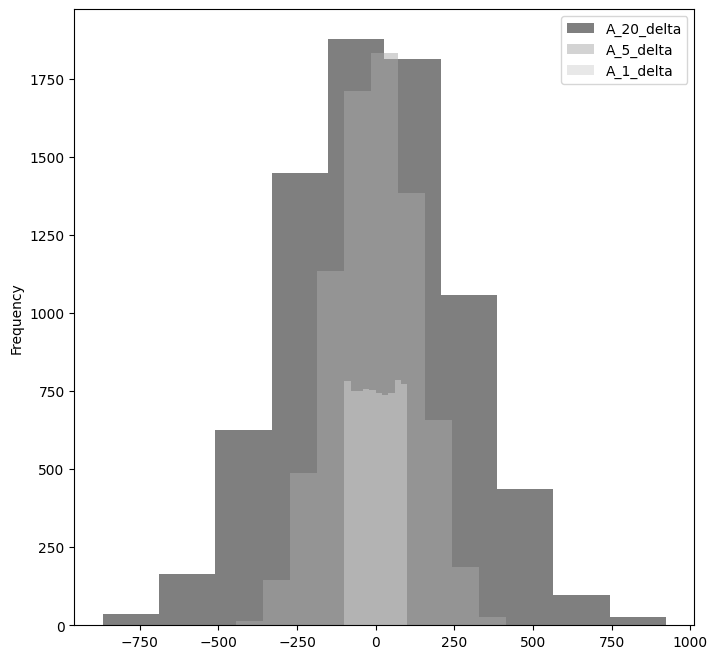

In [43]:
time_series_deltas['A_20_delta'].plot(kind='hist', color='black', alpha=0.5, label='A_20_delta', figsize=(8,8))
time_series_deltas['A_5_delta'].plot(kind='hist', color='darkgray', alpha=0.5, label='A_5_delta', figsize=(8,8))
time_series_deltas['A_1_delta'].plot(kind='hist', color='lightgray', alpha=0.5, label='A_1_delta', figsize=(8,8))
plt.legend()

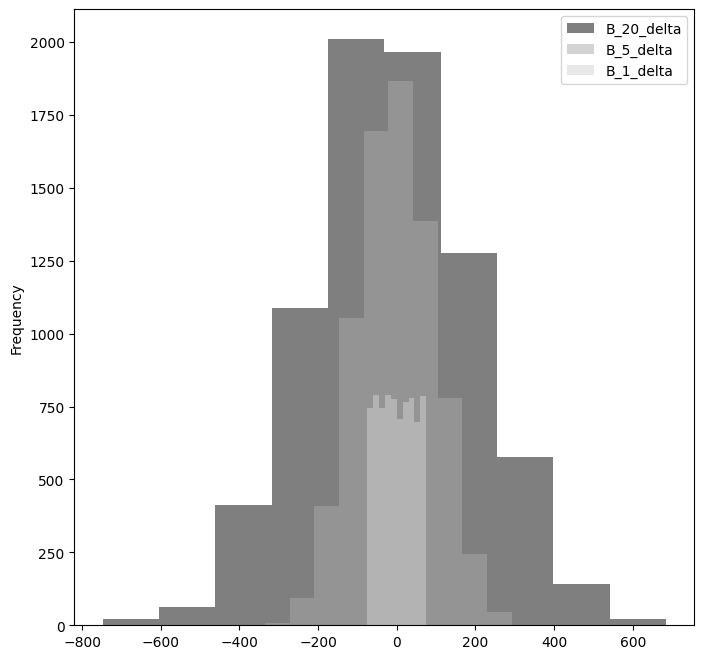

In [44]:
time_series_deltas['B_20_delta'].plot(kind='hist', color='black', alpha=0.5, label='B_20_delta', figsize=(8,8))
time_series_deltas['B_5_delta'].plot(kind='hist', color='darkgray', alpha=0.5, label='B_5_delta', figsize=(8,8))
time_series_deltas['B_1_delta'].plot(kind='hist', color='lightgray', alpha=0.5, label='B_1_delta', figsize=(8,8))
plt.legend()

In [45]:
# Price change density

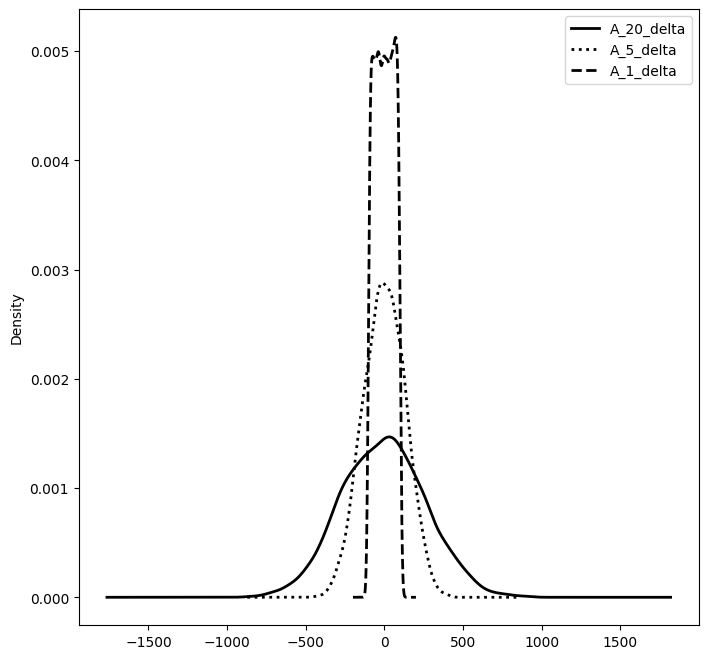

In [46]:
time_series_deltas['A_20_delta'].plot(kind='kde', linestyle='-', linewidth=2, color='black', label='A_20_delta', figsize=(8,8))
time_series_deltas['A_5_delta'].plot(kind='kde', linestyle=':', linewidth=2, color='black', label='A_5_delta', figsize=(8,8))
time_series_deltas['A_1_delta'].plot(kind='kde', linestyle='--', linewidth=2, color='black', label='A_1_delta', figsize=(8,8))
plt.legend()

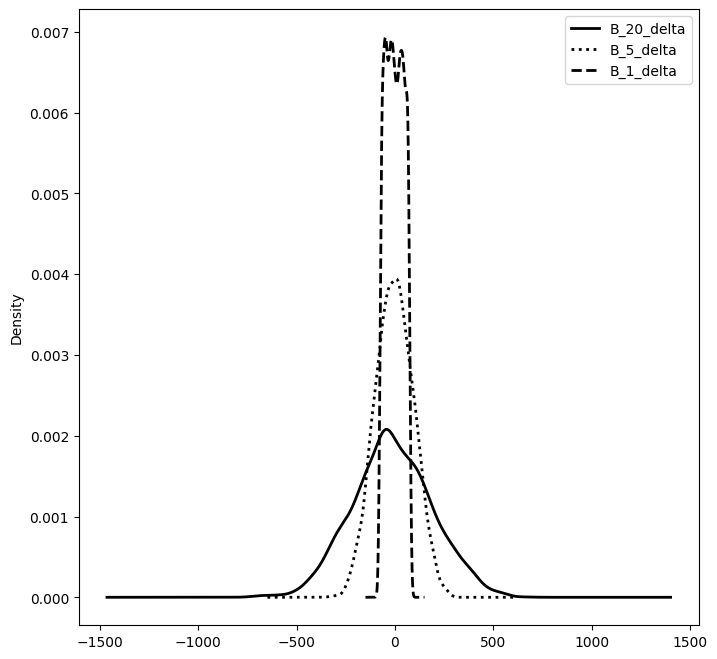

In [47]:
time_series_deltas['B_20_delta'].plot(kind='kde', linestyle='-', linewidth=2, color='black', label='B_20_delta', figsize=(8,8))
time_series_deltas['B_5_delta'].plot(kind='kde', linestyle=':', linewidth=2, color='black', label='B_5_delta', figsize=(8,8))
time_series_deltas['B_1_delta'].plot(kind='kde', linestyle='--', linewidth=2, color='black', label='B_1_delta', figsize=(8,8))
plt.legend()

In [48]:
# Box plots by interval

/tmp/ipykernel_54853/4110368688.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  group_A = time_series[['A']].groupby(pd.Grouper(freq='A'))


<Axes: >

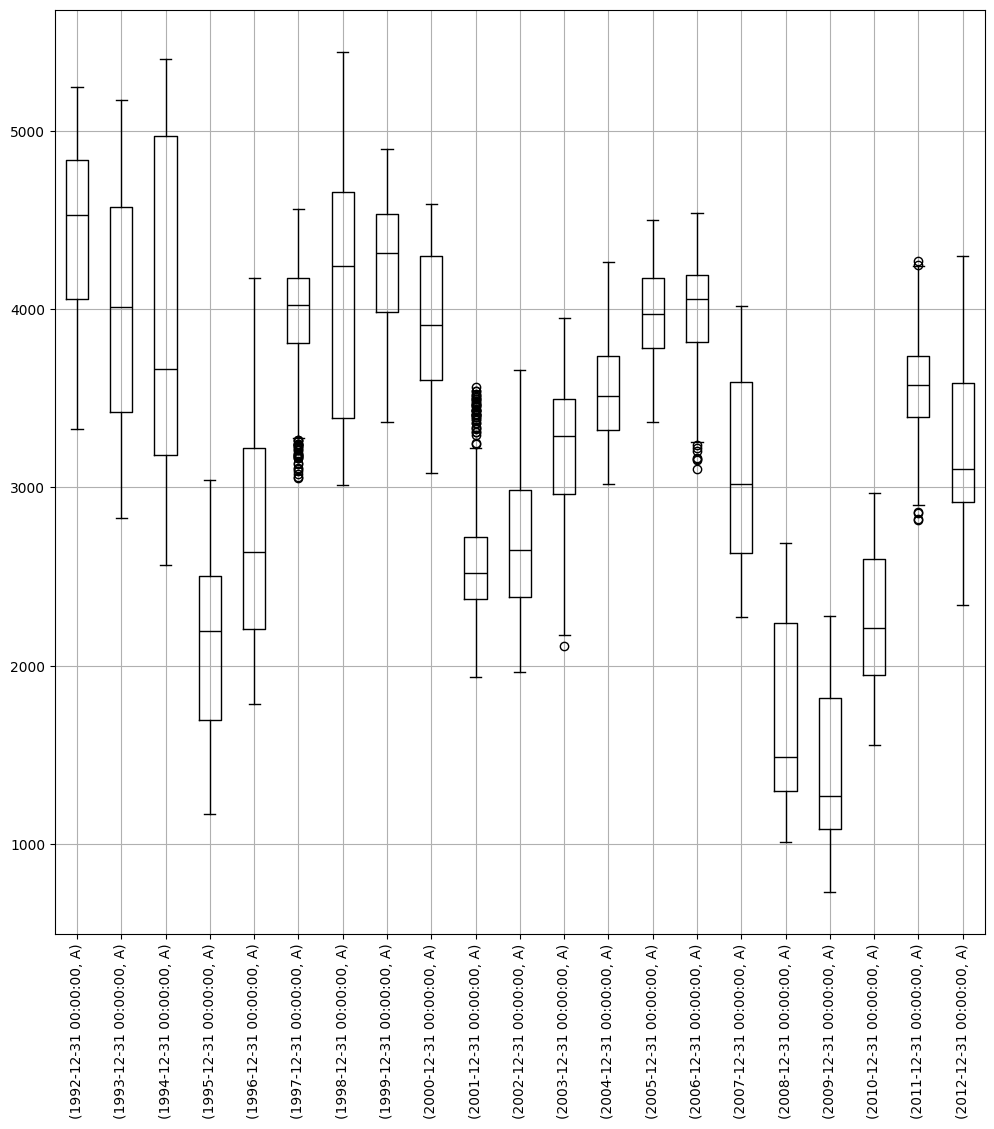

In [49]:
group_A = time_series[['A']].groupby(pd.Grouper(freq='A'))
group_A.boxplot(color='black', subplots=False, rot=90, figsize=(12,12))

/tmp/ipykernel_54853/2971069083.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  group_B = time_series[['B']].groupby(pd.Grouper(freq='A'))


<Axes: >

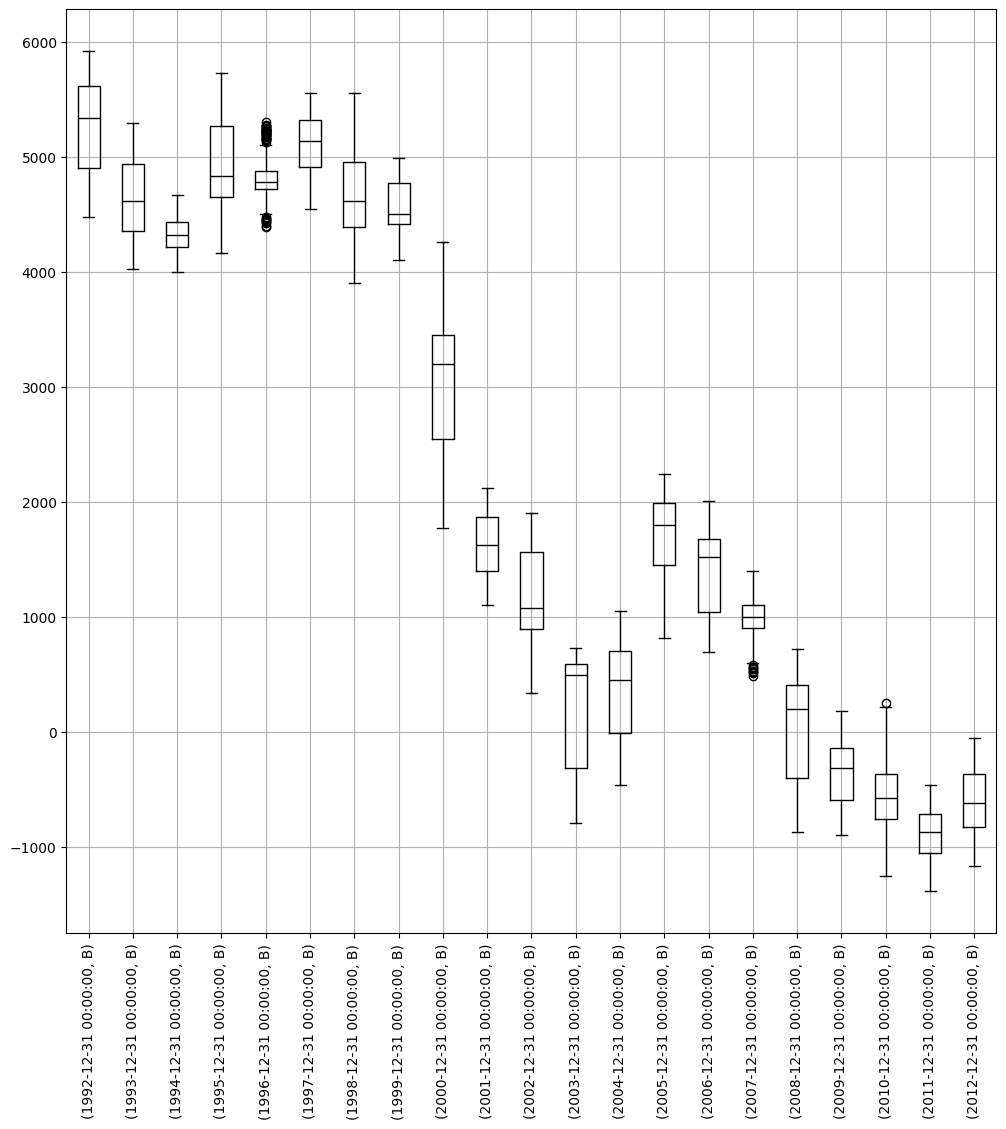

In [50]:
group_B = time_series[['B']].groupby(pd.Grouper(freq='A'))
group_B.boxplot(color='black', subplots=False, rot=90, figsize=(12,12))

In [51]:
# Time series lag scatter plot

array([[<Axes: xlabel='A_1_delta', ylabel='A_1_delta'>,
        <Axes: xlabel='A_5_delta', ylabel='A_1_delta'>,
        <Axes: xlabel='A_20_delta', ylabel='A_1_delta'>,
        <Axes: xlabel='B_1_delta', ylabel='A_1_delta'>,
        <Axes: xlabel='B_5_delta', ylabel='A_1_delta'>,
        <Axes: xlabel='B_20_delta', ylabel='A_1_delta'>],
       [<Axes: xlabel='A_1_delta', ylabel='A_5_delta'>,
        <Axes: xlabel='A_5_delta', ylabel='A_5_delta'>,
        <Axes: xlabel='A_20_delta', ylabel='A_5_delta'>,
        <Axes: xlabel='B_1_delta', ylabel='A_5_delta'>,
        <Axes: xlabel='B_5_delta', ylabel='A_5_delta'>,
        <Axes: xlabel='B_20_delta', ylabel='A_5_delta'>],
       [<Axes: xlabel='A_1_delta', ylabel='A_20_delta'>,
        <Axes: xlabel='A_5_delta', ylabel='A_20_delta'>,
        <Axes: xlabel='A_20_delta', ylabel='A_20_delta'>,
        <Axes: xlabel='B_1_delta', ylabel='A_20_delta'>,
        <Axes: xlabel='B_5_delta', ylabel='A_20_delta'>,
        <Axes: xlabel='B_20_delta', 

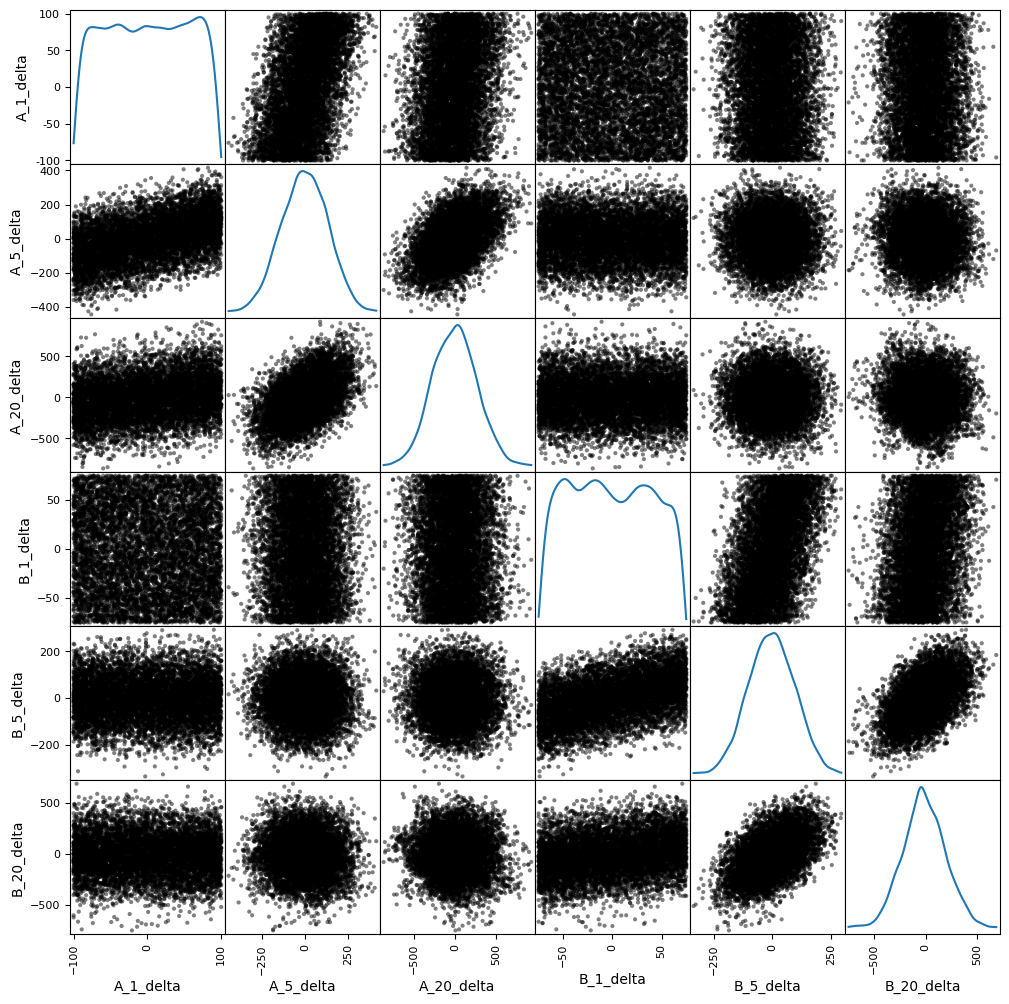

In [52]:
pd.plotting.scatter_matrix(time_series[['A_1_delta', 'A_5_delta', 'A_20_delta', 'B_1_delta', 'B_5_delta', 'B_20_delta']], diagonal='kde', color='black', figsize=(12, 12))

<Axes: xlabel='y(t)', ylabel='y(t + 20)'>

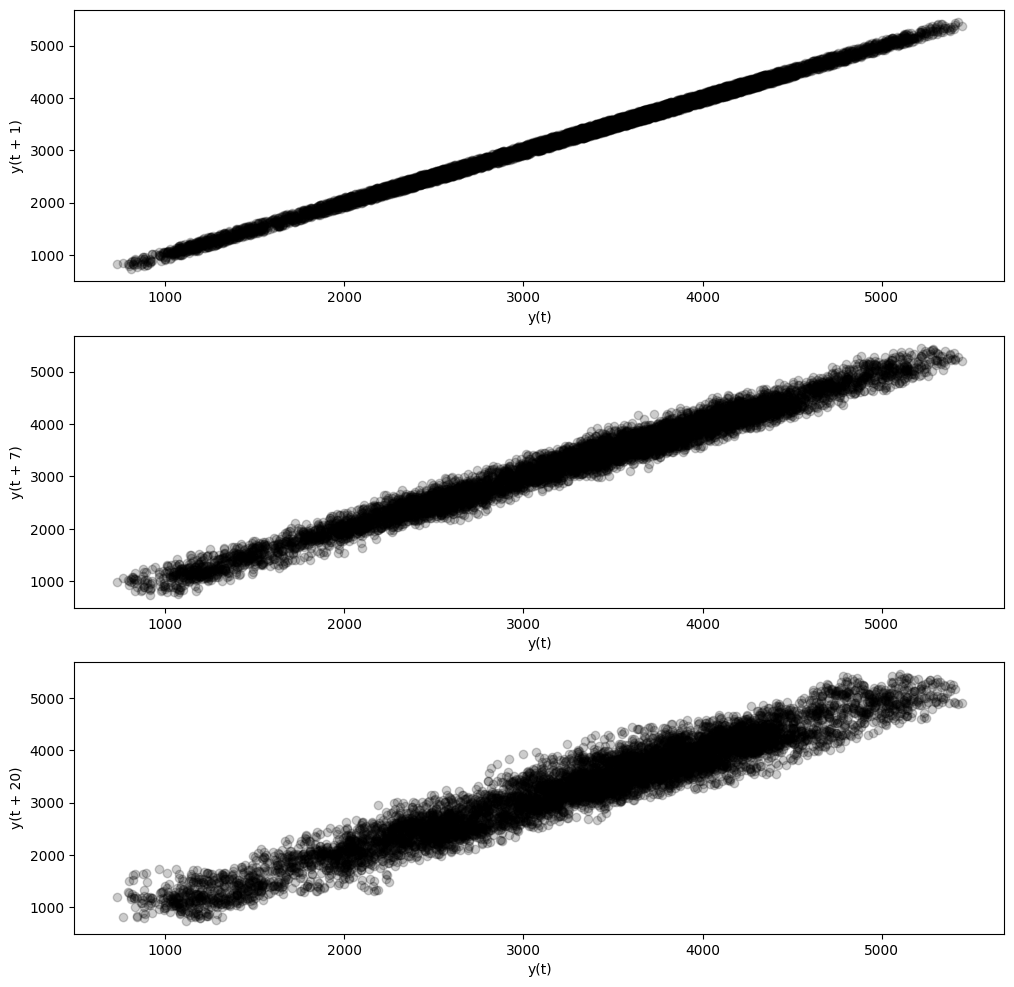

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 12))
pd.plotting.lag_plot(time_series['A'], ax=ax1, lag=1, c='black', alpha=0.2)
pd.plotting.lag_plot(time_series['A'], ax=ax2, lag=7, c='black', alpha=0.2)
pd.plotting.lag_plot(time_series['A'], ax=ax3, lag=20, c='black', alpha=0.2)

<Axes: xlabel='y(t)', ylabel='y(t + 20)'>

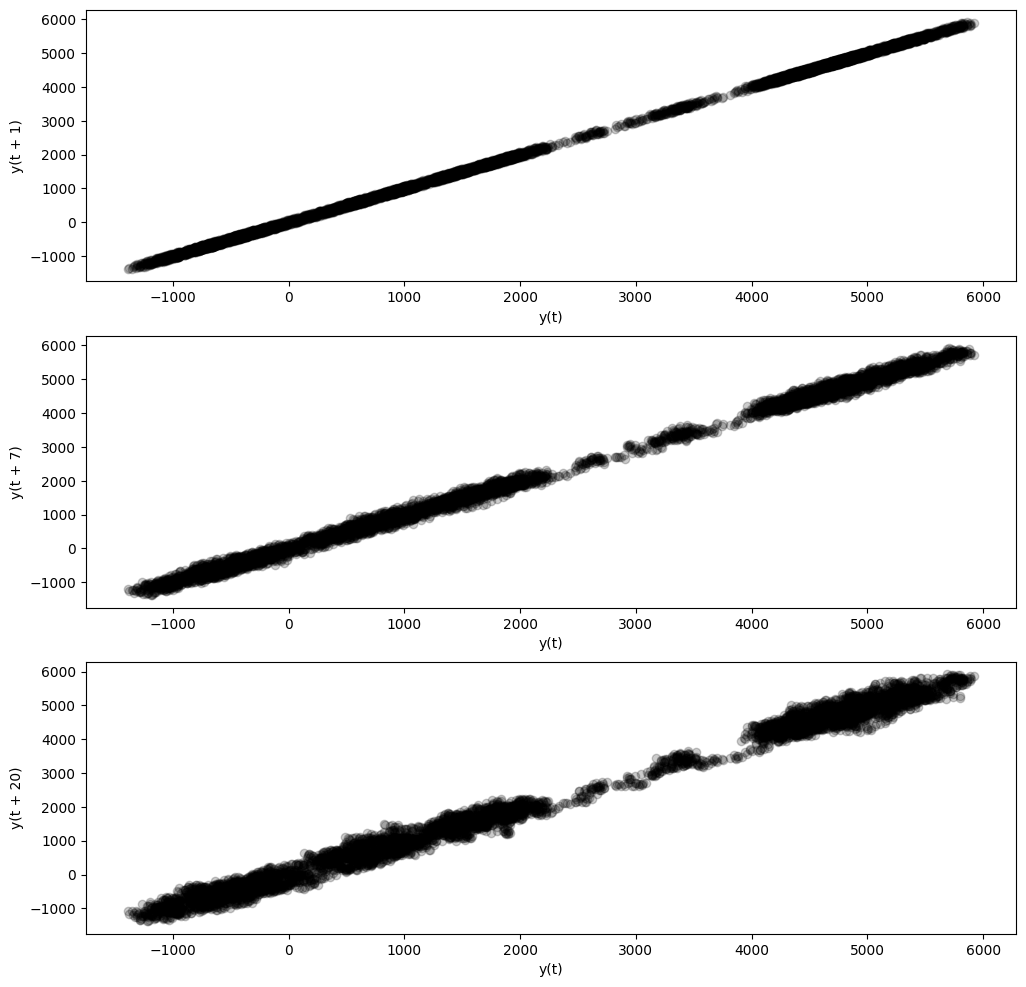

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 12))
pd.plotting.lag_plot(time_series['B'], ax=ax1, lag=1, c='black', alpha=0.2)
pd.plotting.lag_plot(time_series['B'], ax=ax2, lag=7, c='black', alpha=0.2)
pd.plotting.lag_plot(time_series['B'], ax=ax3, lag=20, c='black', alpha=0.2)

In [55]:
# Time series Autocorrelation plots

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

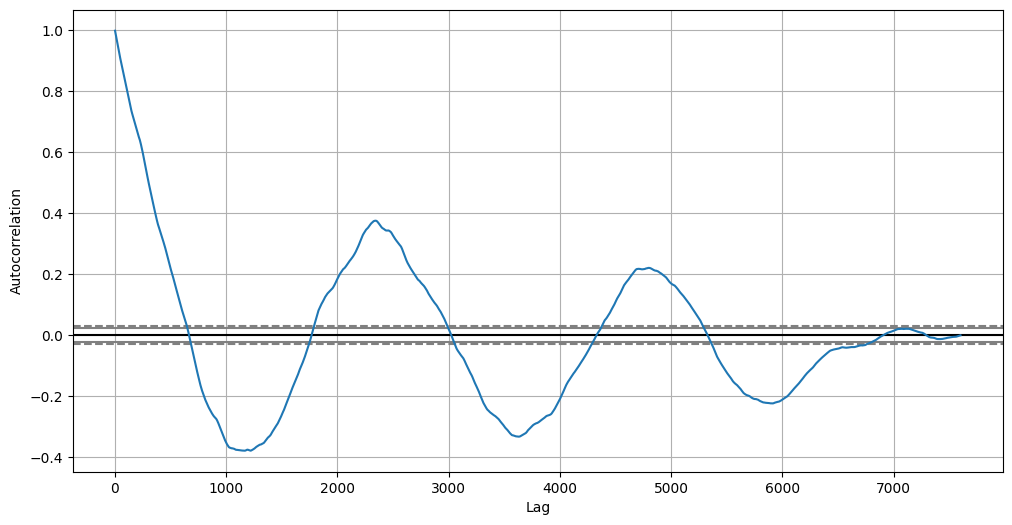

In [56]:
fig, ax = plt.subplots(1, figsize=(12, 6))
pd.plotting.autocorrelation_plot(time_series['A'], ax=ax)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

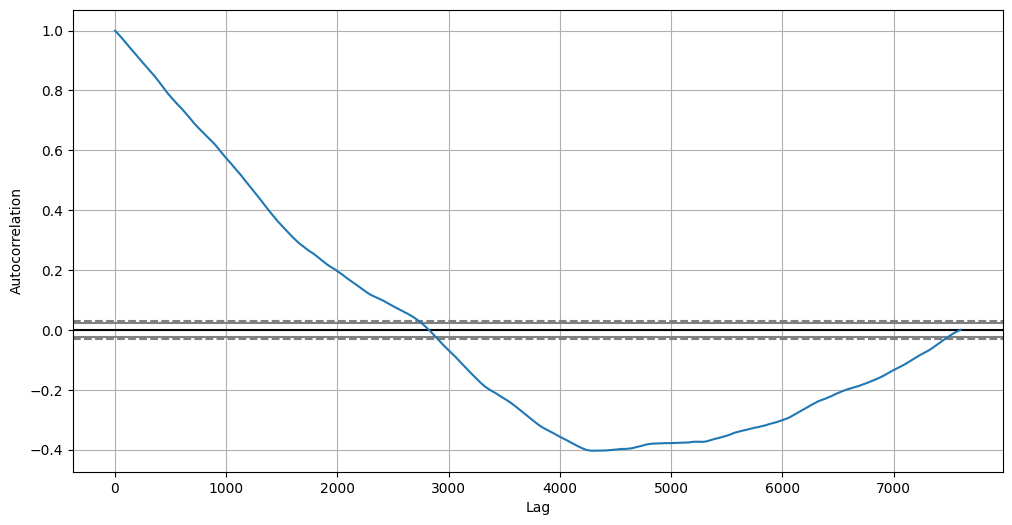

In [57]:
fig, ax = plt.subplots(1, figsize=(12, 6))
pd.plotting.autocorrelation_plot(time_series['B'], ax=ax)